In [2]:
import pandas as pd
import matplotlib.pyplot as pltpenguins
import seaborn as sns
import os
import numpy as np

This is a big data, we can drop Japanese name column

In [39]:
path_anime = os.path.join("Data","Raw_Data","anime.csv")
path_anime_list = os.path.join("Data","Raw_Data","animelist.csv") # This file is 2GB rame causing trouble to load
path_anime_synopsis = os.path.join("Data","Raw_Data","anime_with_synopsis.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
anime_list = pd.read_csv(path_anime_list, low_memory=True,dtype=np.int16) #low_memory because it's a big file and causing a lot of trouble on my machine
# We don't need the type to be other than int, to save memory and it's recommended to define the type.

In [6]:
anime_list.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [7]:
anime_list.describe()

,user_id,anime_id,rating,watching_status,watched_episodes
count,1.092247e+08,1.092247e+08,1.092247e+08,1.092247e+08,1.092247e+08
mean,9.702114e+02,3.535491e+03,4.245717e+00,3.087289e+00,1.181657e+01
std,1.862382e+04,1.851325e+04,3.912888e+00,1.774407e+00,5.137146e+01
min,-3.276800e+04,-3.276800e+04,0.000000e+00,0.000000e+00,-3.130200e+04
25%,-1.499700e+04,2.230000e+02,0.000000e+00,2.000000e+00,0.000000e+00
50%,2.140000e+03,5.029000e+03,5.000000e+00,2.000000e+00,3.000000e+00
75%,1.688300e+04,1.580900e+04,8.000000e+00,6.000000e+00,1.200000e+01
max,3.276700e+04,3.276700e+04,1.000000e+01,5.500000e+01,2.500000e+04


In [8]:
anime_list.isnull().sum() #No null, bad luck :D

user_id             0
anime_id            0
rating              0
watching_status     0
watched_episodes    0
dtype: int64

Nothing to change here, will save it in our Selected folder

In [26]:
path_selected_folder = os.path.join("Data","Selected_data")
saved_file = os.path.join(path_selected_folder,"anime_list.csv")
# anime_list.to_csv(saved_file) It gets bigger after saving it, I will just copy it

In [40]:
! echo $path_anime_list $path_selected_folder
! cp $path_anime_list $path_selected_folder

Data/Raw_Data/animelist.csv Data/Selected_data


In [27]:
anime = pd.read_csv(path_anime, low_memory=True)
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


I will drop Name, Japanese name, Premiered, and Licensors. We can actually remove all names as we have the id of each show.
Duration column needs to be converted to minus only, 

In [28]:
anime.drop(["Name","English name", "Japanese name","Premiered", "Licensors"],axis=1,inplace=True)

In [29]:
anime.head()

,MAL_ID,Score,Genres,Type,Episodes,Aired,Producers,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [30]:
print(f"Genres: {len(anime['Genres'].unique())}, Type: {len(anime['Type'].unique())}, Producers: {len(anime['Producers'].unique())}, Aired: {len(anime['Aired'].unique())},"+
 f"Studios: {len(anime['Studios'].unique())}, Source: {len(anime['Source'].unique())} "+
 f"Duration: {len(anime['Duration'].unique())}, Rating: {len(anime['Rating'].unique())}")

Genres: 5034, Type: 7, Producers: 3783, Aired: 11947,Studios: 1090, Source: 16 Duration: 313, Rating: 7


Will one hot encocde Genres after splitting it and Type as well, Label encode producers, bucktize Aired per year, Label encode studio, one hot encode Source, Convert Duration to minutes, One Hot encode Rating

In [31]:
anime.isnull().sum() #It's Unknown, don't have a null value

MAL_ID           0
Score            0
Genres           0
Type             0
Episodes         0
Aired            0
Producers        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

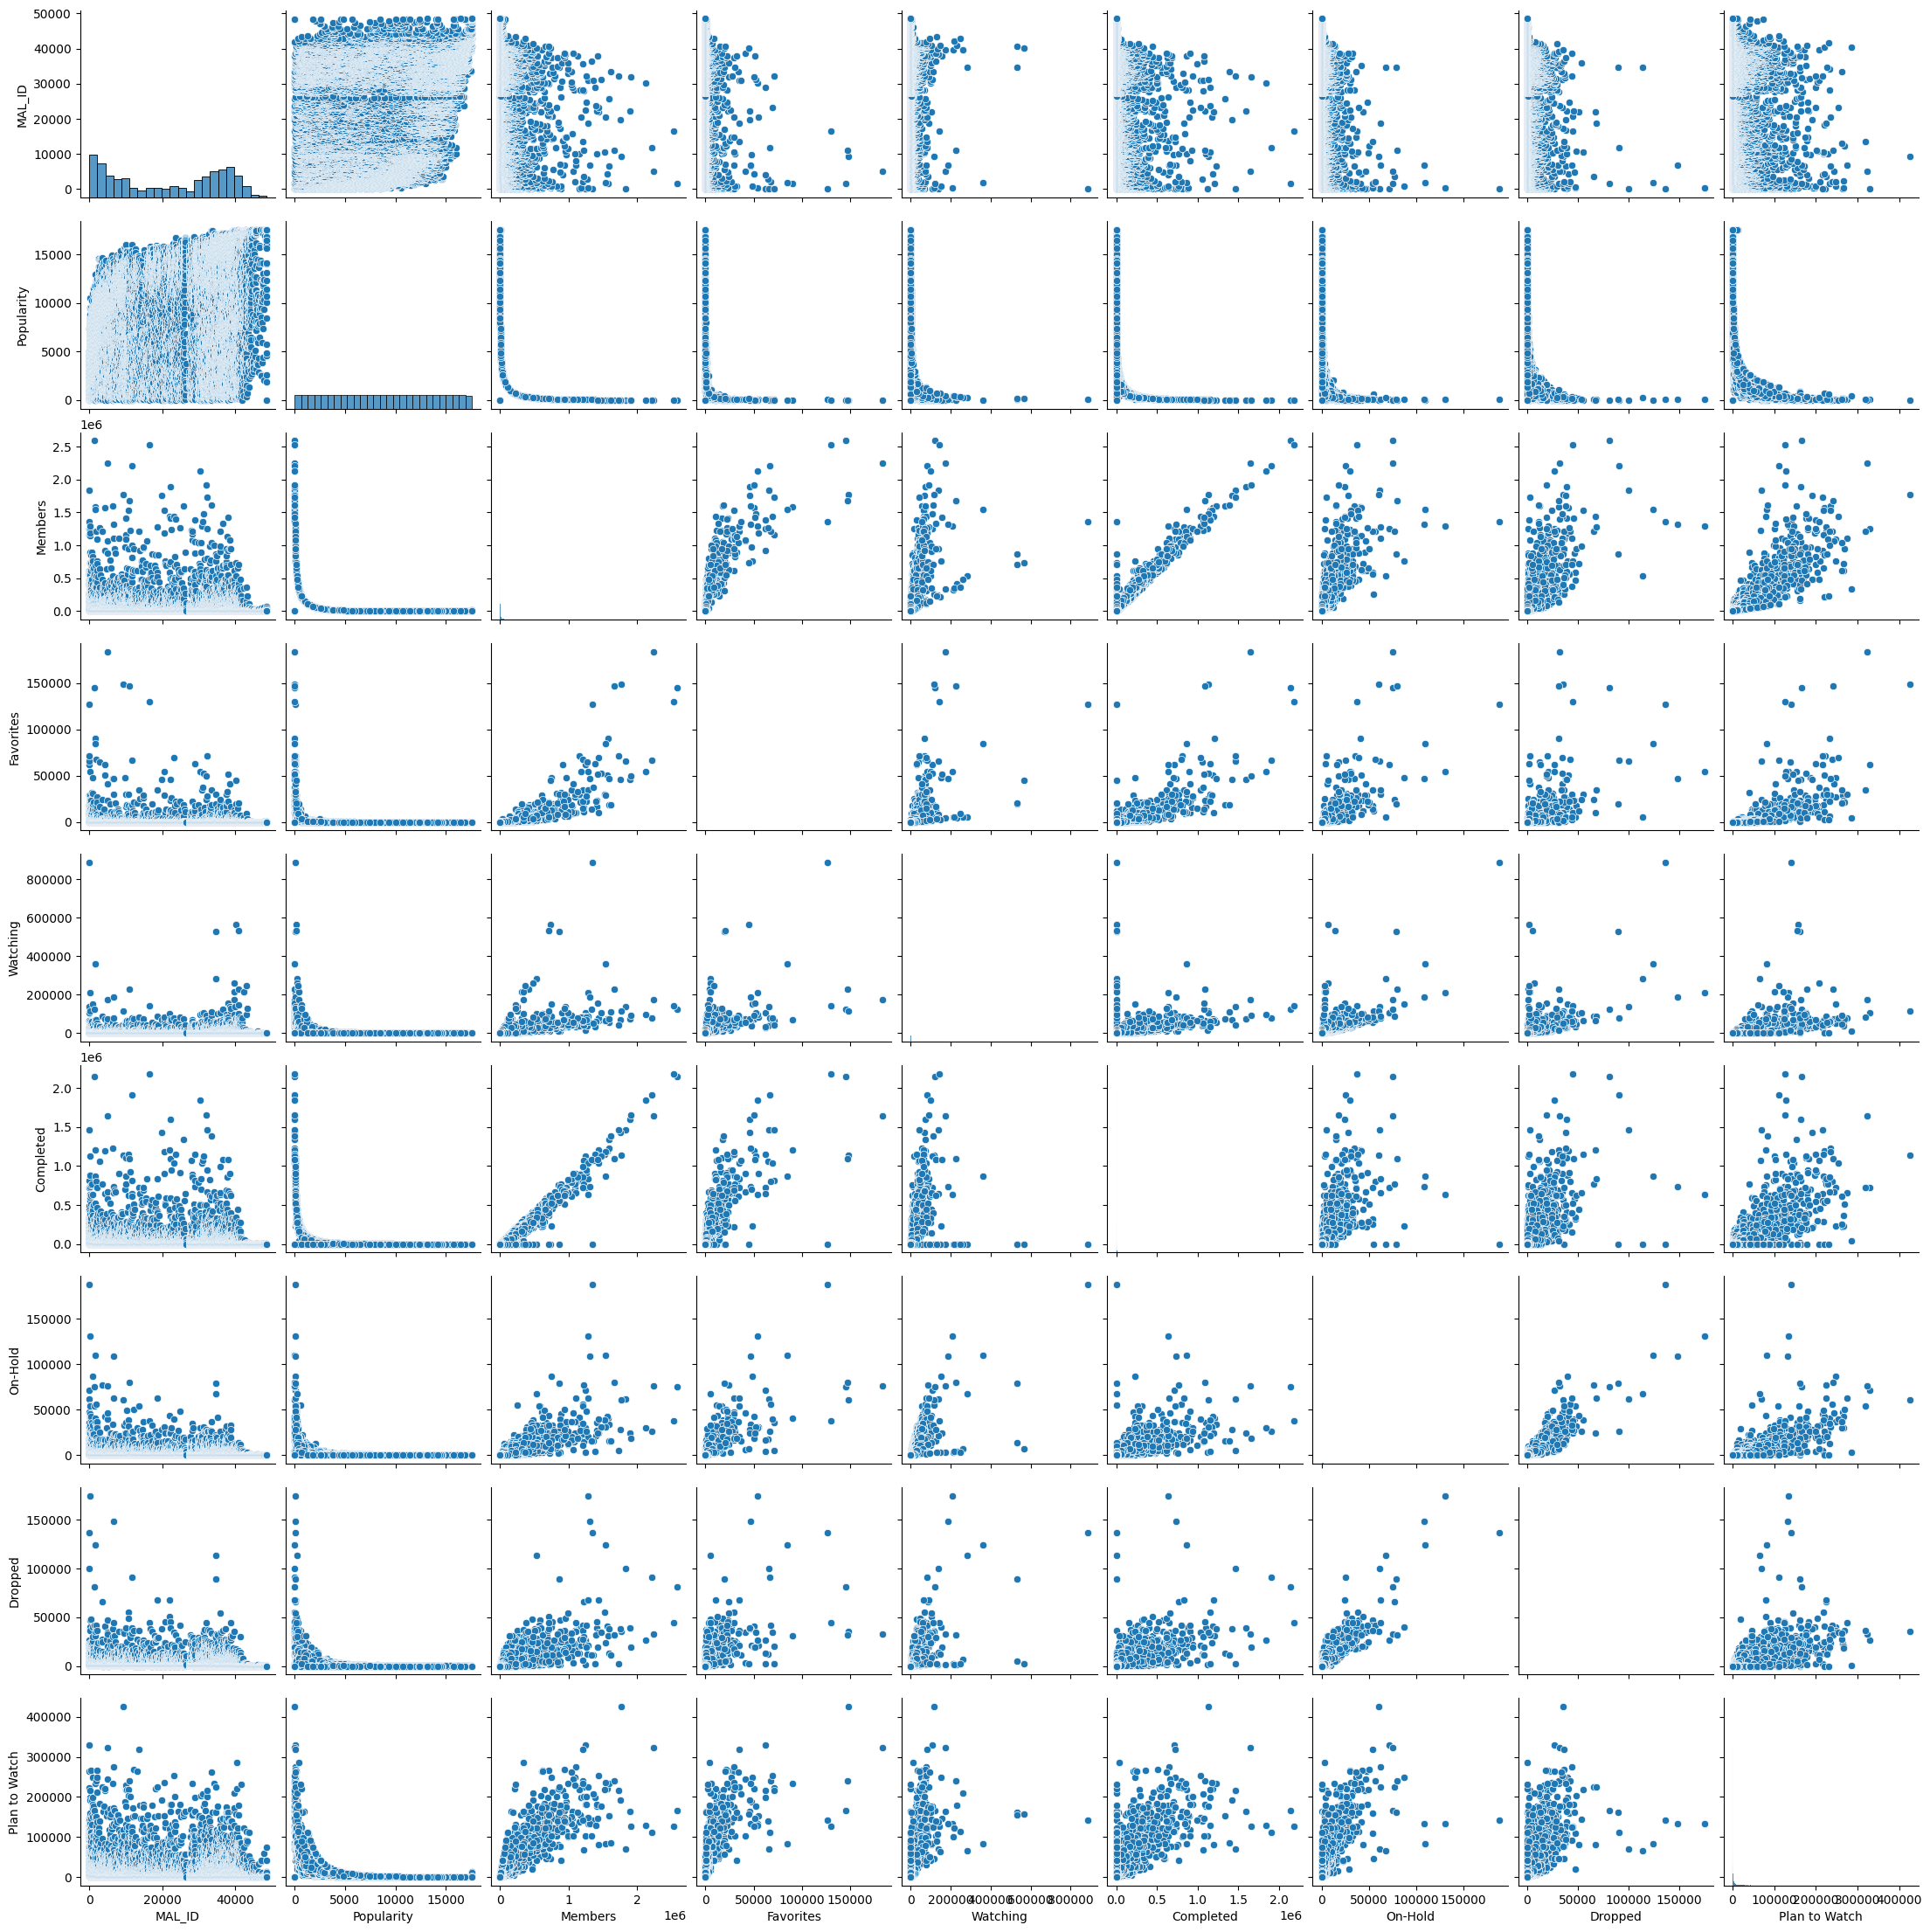

In [32]:
sns.pairplot(anime)

Will save the file now

In [33]:
saved_file = os.path.join(path_selected_folder,"anime.csv")
anime.to_csv(saved_file)

In [34]:
anime_synopsis = pd.read_csv(path_anime_synopsis)
anime_synopsis.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


Will drop name as well, we have the id, If will use NLP we can use synopsis but I don't trust my personal machine for such a huge inputs. In that case we don't this table at all.

In [53]:
anime_synopsis.describe()

,MAL_ID
count,16214.000000
mean,22069.271555
std,14849.798248
min,1.000000
25%,6728.500000
50%,24164.000000
75%,35978.750000
max,48492.000000


In [51]:
anime_synopsis.isnull().sum() #there's a null value in synopsis

MAL_ID       0
Name         0
Score        0
Genres       0
sypnopsis    8
dtype: int64